 ## Project "Shelter Animal Outcomes"

This project was written for a Kaggle competition:
https://www.kaggle.com/c/shelter-animal-outcomes/data
Our goal was to predict the outcome of the animal as they leave the Animal Center.. We use the date comes from Austin Animal Center (October 1st, 2013 - March, 2016). Outcomes represent the status of animals as they leave the Animal Center. 

The first look at the data:

In [1]:
import pandas
data = pandas.read_csv("train.csv")
data.head()


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [2]:
data = data[data["OutcomeType"] != "NaN"]
data['AnimalType'] =data['AnimalType'].fillna("Dog")
data['Breed'] =data['Breed'].fillna("Mix")
data['SexuponOutcome'] =data['SexuponOutcome'].fillna("Neutered Male")

We do not need AnimalId, Color, DateTime, and OutcomeSubtype.

In [3]:
del data["AnimalID"]
del data["DateTime"]
del data["OutcomeSubtype"]
del data["Color"]

We have 5 different outcomes. Let's plot the distributions of outcomes

/Users/kate/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


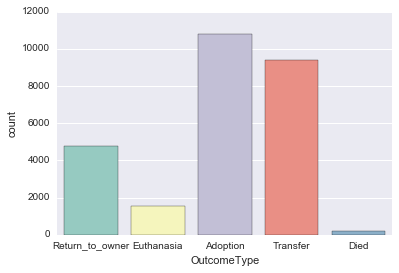

In [4]:
import seaborn as sns
%matplotlib inline
sns.countplot(data.OutcomeType, palette='Set3')

Now let's plot the outcomes by sex

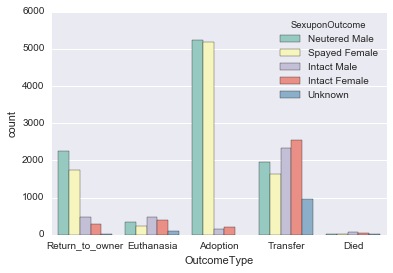

In [5]:
sns.countplot(data=data, x='OutcomeType',hue='SexuponOutcome', palette="Set3")

Thus plot gives us some interesting information:
Neutered Male and Spayed Female have a great chance to be adopted, but it is very hard to find new family for Intact Male and Intact Female! 

The next observation is that we do not know some animals' names. I think, animals with known name should be more likely to returnee home since we can suggest that these animals has an ID tag. Thus, can replace known name by 1 and unknown name by 0. We also should replace strings in "AnimalType" by numeric values.

In [6]:
data['Name'] =data['Name'].fillna(0)
data.loc[data['Name'] != 0, "Name"] = 1

print(data["AnimalType"].unique())
data.loc[data["AnimalType"]== "Dog", "AnimalType"] = 1
data.loc[data["AnimalType"]!= 1, "AnimalType"] = 0

['Dog' 'Cat']


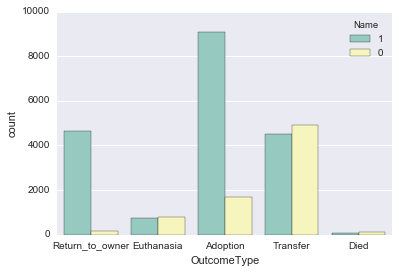

In [7]:
sns.countplot(data=data, x='OutcomeType',hue='Name', palette="Set3")

This graph shows how important is for an animal to have an ID tag (I think that the shelter staff learned the names from the tags. The animals with unknown names have almost no chance to return to owners and have less chance to be adopted.

Now let's convert age into a float:

In [8]:
def age_as_float(x):
    x = str(x)
    x_list = x.split(" ")
    if len(x_list)==2:
        if x_list[1] =='year': return 1.0
        elif x_list[1] =='years': return float(x_list[0])
        elif x_list[1] =='month': return float(x_list[0])/12
        elif x_list[1] =='months': return float(x_list[0])/12
        elif x_list[1] =='week': return float(x_list[0])
        elif x_list[1] =='weeks': return float(x_list[0])/54
        elif x_list[1] =='days': return float(x_list[0])/365
        else: return 0
    else:return 0

data['AgeuponOutcome'] = data.AgeuponOutcome.apply(age_as_float)
#now we have 0 age for the animals with undefined age. Let's replace 0 by mean age:
data.loc[data['AgeuponOutcome']== 0, "AgeuponOutcome"] = data['AgeuponOutcome'].median()
data.head()

,Name,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,1,Return_to_owner,1,Neutered Male,1.000000,Shetland Sheepdog Mix
1,1,Euthanasia,0,Spayed Female,1.000000,Domestic Shorthair Mix
2,1,Adoption,1,Neutered Male,2.000000,Pit Bull Mix
3,0,Transfer,0,Intact Male,0.055556,Domestic Shorthair Mix
4,0,Transfer,1,Neutered Male,2.000000,Lhasa Apso/Miniature Poodle


Now let's think about SexuponOutcome and Breed columns.

In [9]:
len(data["Breed"].unique())

1380

In [10]:
data["Breed"].unique()[ :50]

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       'Lhasa Apso/Miniature Poodle', 'Cairn Terrier/Chihuahua Shorthair',
       'American Pit Bull Terrier Mix', 'Cairn Terrier',
       'Miniature Schnauzer Mix', 'Yorkshire Terrier Mix',
       'Great Pyrenees Mix', 'Angora Mix', 'Flat Coat Retriever Mix',
       'Queensland Heeler Mix', 'Plott Hound/Boxer', 'German Shepherd Mix',
       'American Staffordshire Terrier Mix', 'Chihuahua Shorthair Mix',
       'Russian Blue Mix', 'Labrador Retriever Mix',
       'Collie Smooth/German Shepherd', 'Domestic Longhair Mix', 'Beagle',
       'Pit Bull/Labrador Retriever', 'Blue Lacy Mix',
       'Black Mouth Cur Mix', 'Dachshund/Beagle', 'Dachshund Mix',
       'Maltese Mix', 'Pointer Mix', 'English Foxhound', 'Vizsla Mix',
       'German Shepherd/Great Pyrenees',
       'Cardigan Welsh Corgi/Chihuahua Shorthair', 'Domestic Longhair',
       'Chow Chow/Pit Bull', 'Chihuahua Shorthair', 'Siamese Mix',
       'Domestic

Very few animals have a pure breed (for example'Cairn Terrier') and a lot of animals are mix. Let's replace all variations of mix by "Mix"

In [11]:
def mix(x):
    x = str(x)
    if x.find('Mix')> -1 or x.find('mix')> -1 or x.find("/") > -1: return "Mix"
    else: return x
data['Breed'] = data.Breed.apply(mix)
print(len(data["Breed"].unique()))

140


In [12]:
#140 is too much! 
#let's Mis breed will be 1 and pure breeds will be 0
data.loc[data["Breed"]== "Mix", "Breed"] = 1
print(data["Breed"].unique())
data.loc[data["Breed"]!= 1, "Breed"] = 0
print(data["Breed"].unique())

[1 'Cairn Terrier' 'Beagle' 'English Foxhound' 'Domestic Longhair'
 'Chihuahua Shorthair' 'Lhasa Apso' 'Pit Bull' 'Dachshund Longhair'
 'Maltese' 'Siberian Husky' 'Great Dane' 'Chesa Bay Retr' 'German Shepherd'
 'English Pointer' 'Cocker Spaniel' 'Domestic Shorthair' 'Shih Tzu'
 'Dachshund' 'Anatol Shepherd' 'Labrador Retriever' 'English Bulldog'
 'Basset Hound' 'Boxer' 'Miniature Poodle' 'Doberman Pinsch' 'Harrier'
 'Burmese' 'Domestic Medium Hair' 'Border Collie' 'Vizsla'
 'Yorkshire Terrier' 'Bull Terrier' 'Jack Russell Terrier' 'Pekingese'
 'American Pit Bull Terrier' 'Miniature Schnauzer' 'Rottweiler'
 'Great Pyrenees' 'Australian Shepherd' 'Greyhound' 'Bernese Mountain Dog'
 'Chihuahua Longhair' 'Pembroke Welsh Corgi' 'Australian Cattle Dog'
 'Shetland Sheepdog' 'Weimaraner' 'Miniature Pinscher' 'Boston Terrier'
 'Siamese' 'Carolina Dog' 'Golden Retriever' 'Pug' 'Dogo Argentino'
 'Cavalier Span' 'Staffordshire' 'Rat Terrier' 'Akita' 'Chow Chow'
 'American Foxhound' 'Dachshund Wir

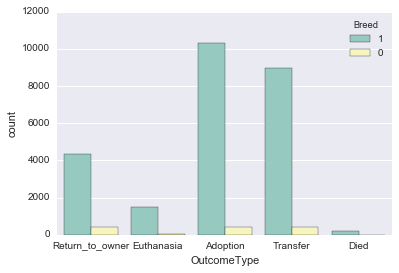

In [13]:
sns.countplot(data=data, x='OutcomeType',hue='Breed', palette="Set3")

It looks like the proportion of pure and mix breeds are about the same for all categories of outcome.

In [14]:
#I used tutorial from https://www.dataquest.io/learn
def create_dummies(var):
    var_unique = var.unique()
    var_unique.sort()
    dummy = pandas.DataFrame()
    for val in var_unique:
    #for val in var_unique[:-1]:
        # which columns are equal to our unique value
        d = var == val
        # make a new column with a dummy variable
        dummy[var.name + "_" + str(val)] = d.astype(int)
    return(dummy)

sex_dummies = create_dummies(data["SexuponOutcome"])
data = pandas.concat([data, sex_dummies], axis=1)
del data["SexuponOutcome"]
data.head()

,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown
0,1,Return_to_owner,1,1.000000,1,0,0,1,0,0
1,1,Euthanasia,0,1.000000,1,0,0,0,1,0
2,1,Adoption,1,2.000000,1,0,0,1,0,0
3,0,Transfer,0,0.055556,1,0,1,0,0,0
4,0,Transfer,1,2.000000,1,0,0,1,0,0


Now we can try multi class logistic regression to predict outcomes.

In [15]:
features = ['Name','AnimalType', 'AgeuponOutcome', 'Breed',
       'SexuponOutcome_Intact Female', 'SexuponOutcome_Intact Male',
       'SexuponOutcome_Neutered Male', 'SexuponOutcome_Spayed Female', 'SexuponOutcome_Unknown']

In [17]:
import numpy as np
# shuffle data
shuffled_rows = np.random.permutation(data.index)

# Select 70% of the dataset to be training data
highest_train_row = int(data.shape[0] * .70)
train = data.loc[shuffled_rows[:highest_train_row], :]

# Select 30% of the dataset to be test data
my_test = data.loc[shuffled_rows[highest_train_row:], :]

train.head()

,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown
14795,0,Adoption,1,0.500000,1,0,0,1,0,0
24574,0,Transfer,0,0.005479,1,0,1,0,0,0
5368,1,Adoption,0,8.000000,1,0,0,1,0,0
5984,1,Transfer,0,0.833333,1,0,0,0,1,0
12023,1,Transfer,0,3.000000,1,0,0,0,1,0


In [18]:
from sklearn import linear_model

alg = linear_model.LogisticRegression(random_state=1)
alg.fit(train[features], train["OutcomeType"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
probs = alg.predict_proba(my_test[features])

In [20]:
from sklearn import metrics
score = metrics.log_loss(my_test["OutcomeType"], probs)
print(score)

0.923281657861


Not bad. Now let's create a prediction for text.csv and submit it for Kagle competition. 

In [21]:
test = pandas.read_csv("test.csv")
test['AnimalType'] =test['AnimalType'].fillna("Dog")
test['Breed'] =test['Breed'].fillna("Mix")
del test['Color']
test['SexuponOutcome'] =test['SexuponOutcome'].fillna("Neutered Male")
#del test["ID"]
del test["DateTime"]
test['Name'] =test['Name'].fillna(0)
test.loc[test['Name'] != 0, "Name"] = 1
test.loc[test["AnimalType"]== "Dog", "AnimalType"] = 1
test.loc[test["AnimalType"]!= 1, "AnimalType"] = 0
test['AgeuponOutcome'] = test.AgeuponOutcome.apply(age_as_float)
test.loc[test['AgeuponOutcome']== 0, "AgeuponOutcome"] = test['AgeuponOutcome'].median()
test.loc[test["Breed"]== "Mix", "Breed"] = 1
test.loc[test["Breed"]!= 1, "Breed"] = 0
sex_dummies = create_dummies(test["SexuponOutcome"])
test = pandas.concat([test, sex_dummies], axis=1)
del test["SexuponOutcome"]
test.head()

,ID,Name,AnimalType,AgeuponOutcome,Breed,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown
0,1,1,1,0.833333,0,1,0,0,0,0
1,2,1,1,2.000000,0,0,0,0,1,0
2,3,1,0,1.000000,0,0,0,1,0,0
3,4,1,1,0.333333,0,0,1,0,0,0
4,5,1,1,2.000000,0,0,0,1,0,0


In [22]:
result = pandas.DataFrame(alg.predict_proba(test[features]), index=test.index, columns=alg.classes_)
result.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,0.044719,0.017209,0.040645,0.233298,0.664129
1,0.528452,0.003254,0.011591,0.288949,0.167755
2,0.637056,0.009424,0.011609,0.071226,0.270684
3,0.037671,0.023269,0.045821,0.318619,0.574620
4,0.474270,0.003623,0.015603,0.322424,0.184080


In [24]:
sample_submission = pandas.read_csv("sample_submission.csv")
sample_submission.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


In [27]:
mid = sample_submission['ID']
result.insert(0, 'ID', mid)
result.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.044719,0.017209,0.040645,0.233298,0.664129
1,2,0.528452,0.003254,0.011591,0.288949,0.167755
2,3,0.637056,0.009424,0.011609,0.071226,0.270684
3,4,0.037671,0.023269,0.045821,0.318619,0.574620
4,5,0.474270,0.003623,0.015603,0.322424,0.184080


In [28]:
result.to_csv("etcareva3.csv", index=False)

I got 0.92871 score after submission. The scores of other participants are between 0.45 and 29.00. 

## Conclusion

I used multi class logistic regression for this project and got log_loss 0.92871. I also did some useful observations.
1. Neutered Male and Spayed Female have a great chance to be adopted, but it is very hard to find new family for Intact Male and Intact Female!
2. It is important for an animal to have an ID tag (I think that the shelter staff learned the names from the tags. The animals with unknown names have almost no chance to return to owners and have less chance to be adopted.